In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
import pandas as pd

In [3]:
from trasim_simplified.core.constant import CFM

cf_name = CFM.IDM
if cf_name == CFM.IDM:
    param_names = ["s0", "v0", "T", "omega", "d", "delta"]
elif cf_name == CFM.ACC:
    param_names = ["k1", "k2", "thw", "s0"]
else:
    raise ValueError(f"cf_name {cf_name} error")

In [4]:
df_ori: dict[str, pd.DataFrame] = pd.read_pickle(r'E:\PyProject\car-following-model-test\tests\data\ori_dec_acc_traj_s.pkl')
df_clb: dict[str, pd.DataFrame] = pd.read_pickle(r"E:\PyProject\car-following-model-test\tests\data\clb_dec_acc_traj_s" + f"_{cf_name}.pkl")
df_param: pd.DataFrame = pd.read_pickle(r"E:\PyProject\car-following-model-test\tests\data\clb_dec_acc_param_df" + f"_{cf_name}.pkl")

# 计算迟滞强度

In [5]:
from trasim_simplified.util.hysteresis.intensity import cal_sv_intensity, cal_acc_intensity
from trasim_simplified.core.constant import TrackInfo as TI, Prefix
from trasim_simplified.core.kinematics.cfm import get_cf_default_param, get_cf_equilibrium

ids = list(df_ori["dec"].keys())
sv_intensity = {}
ori_sv_intensity = {}
acc_intensity = {}
ori_acc_intensity = {}

cf_e = get_cf_equilibrium(cf_name)

for id_ in ids:
    cf_param = {name: df_param[df_param[TI.Pair_ID] == id_][name].iloc[0] for name in param_names}
    l_length = df_clb["dec"][id_][Prefix.leader + TI.v_Length].iloc[0]
    sv_intensity[id_] = cal_sv_intensity(
        df_clb["dec"][id_][Prefix.leader + TI.x] - df_clb["dec"][id_][TI.x] - l_length, df_clb["dec"][id_][TI.v], df_clb["acc"][id_][Prefix.leader + TI.x] - df_clb["acc"][id_][TI.x] - l_length, df_clb["acc"][id_][TI.v],
        cf_e, cf_param)
    ori_sv_intensity[id_] = cal_sv_intensity(
        df_ori["dec"][id_][Prefix.leader + TI.x] - df_ori["dec"][id_][TI.x] - l_length, df_ori["dec"][id_][TI.v], df_ori["acc"][id_][Prefix.leader + TI.x] - df_ori["acc"][id_][TI.x] - l_length, df_ori["acc"][id_][TI.v],
        cf_e, cf_param)
    # sv_intensity[id_].update(cal_acc_intensity(df_clb["dec"][id_][TI.a], df_clb["acc"][id_][TI.a]))
    # ori_sv_intensity[id_].update(cal_acc_intensity(df_ori["dec"][id_][TI.a], df_ori["acc"][id_][TI.a]))
sv_intensity

{192: {'dec_vs': 1.809254770565977,
  'acc_vs': 4.196456695639093,
  'total_vs': 6.005711466205071},
 195: {'dec_vs': 1.0205985085761184,
  'acc_vs': 3.418599282450155,
  'total_vs': 4.439197791026274},
 196: {'dec_vs': 0.964047787656152,
  'acc_vs': 1.9201050066548409,
  'total_vs': 2.884152794310993},
 197: {'dec_vs': 1.7520053936278122,
  'acc_vs': 4.396527280202411,
  'total_vs': 6.148532673830223},
 199: {'dec_vs': 0.8549411737025335,
  'acc_vs': 2.610937434498591,
  'total_vs': 3.4658786082011246},
 203: {'dec_vs': 0.2861392574057412,
  'acc_vs': -4.657854166178568,
  'total_vs': -4.371714908772827},
 248: {'dec_vs': -0.7061842175431735,
  'acc_vs': 4.369291087388488,
  'total_vs': 3.6631068698453144},
 249: {'dec_vs': 0.7193215252003969,
  'acc_vs': 0.4097396538126154,
  'total_vs': 1.1290611790130123},
 251: {'dec_vs': 2.7094622073879924,
  'acc_vs': 3.2312731947710027,
  'total_vs': 5.940735402158995},
 253: {'dec_vs': 1.3910361707215557,
  'acc_vs': 2.1183850108756426,
  'tot

In [6]:
column_names = sv_intensity[list(sv_intensity.keys())[0]].keys()
df_intensity = pd.DataFrame([list(v.values()) for v in sv_intensity.values()], columns=column_names)
df_intensity[TI.Pair_ID] = sv_intensity.keys()

df_ori_intensity = pd.DataFrame([v.values() for v in ori_sv_intensity.values()], columns=["ori_" + name for name in column_names])
df_ori_intensity[TI.Pair_ID] = ori_sv_intensity.keys()

df_param_merge: pd.DataFrame = df_param.merge(df_intensity, on=TI.Pair_ID)
df_param_merge: pd.DataFrame = df_param_merge.merge(df_ori_intensity, on=TI.Pair_ID)
df_param_merge

,s0,v0,T,omega,d,delta,Pair_ID,ObjV,dec_vs,acc_vs,total_vs,ori_dec_vs,ori_acc_vs,ori_total_vs
0,5.263910,49.999962,1.541605,1.320260,8.627592,10.0,192,11.514163,1.809255,4.196457,6.005711,1.386539,4.551603,5.938142
1,3.644018,12.264595,0.733242,1.753525,9.999924,10.0,195,9.598012,1.020599,3.418599,4.439198,NaN,2.715314,NaN
2,5.456839,13.373985,1.240511,2.796910,6.160598,10.0,196,7.231744,0.964048,1.920105,2.884153,1.539697,1.684258,3.223955
3,6.034975,15.261345,1.485023,1.830330,10.000000,7.0,197,17.875899,1.752005,4.396527,6.148533,3.079560,6.107782,9.187342
4,4.335928,14.275742,1.358891,2.036001,2.749949,10.0,199,11.664526,0.854941,2.610937,3.465879,1.517514,2.499645,4.017158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.000000,35.447350,1.765614,5.206991,1.219058,1.0,6216,10.668306,-1.136124,-0.843750,-1.979874,-0.563661,-0.788224,-1.351885
316,2.136602,39.901276,0.310650,1.500203,0.970608,1.0,6394,17.509274,0.252013,7.533955,7.785968,0.676814,8.854977,9.531791
317,2.732277,26.479301,1.212530,1.613764,8.744552,10.0,6395,6.639412,1.332447,7.644695,8.977142,1.718882,8.007186,9.726067
318,2.590122,16.543350,1.469288,2.777980,10.000000,3.0,6417,19.415002,0.570691,1.834884,2.405575,1.788764,3.170634,4.959398


# 计算外部因素

In [9]:
for id_ in ids:
    

dict_keys(['dec', 'acc'])


# 计算内部因素

# 处理后轨迹数据描述性统计

In [15]:
print(f'RMSE(dec_vs): {np.sqrt(np.mean(df_param_merge["dec_vs"] - df_param_merge["ori_dec_vs"]) ** 2)}')
print(f'RMSE(acc_vs): {np.sqrt(np.mean(df_param_merge["acc_vs"] - df_param_merge["ori_acc_vs"]) ** 2)}')
print(f'RMSE(total_vs): {np.sqrt(np.mean(df_param_merge["total_vs"] - df_param_merge["ori_total_vs"]) ** 2)}')

RMSE(dec_vs): 0.6224126406413729
RMSE(acc_vs): 0.37471959244833736
RMSE(total_vs): 1.0047735145022718


In [11]:
pd.options.display.precision = 2

df_param_merge[["dec_vs", "acc_vs", "total_vs", "ori_dec_vs", "ori_acc_vs", "ori_total_vs"]].describe().loc[["mean", "std", "min", "max"]].T

,mean,std,min,max
dec_vs,0.93,1.67,-5.88,8.43
acc_vs,3.69,4.09,-4.66,24.01
total_vs,4.62,5.13,-8.10,28.73
ori_dec_vs,1.63,1.93,-4.33,10.04
ori_acc_vs,4.19,4.30,-4.65,26.61
ori_total_vs,5.83,5.39,-6.30,30.15


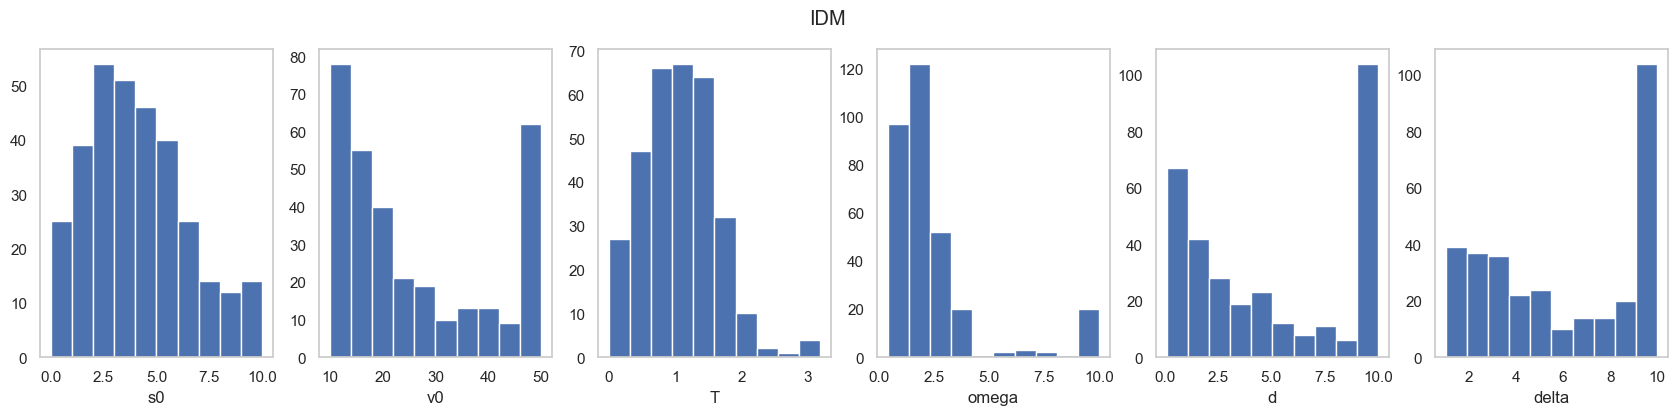

In [7]:
fig, axes = plt.subplots(1, len(param_names), figsize=(21, 4))
fig.suptitle(cf_name)
for i, name in enumerate(param_names):
    axes[i].set_xlabel(name)
    axes[i].hist(df_param_merge[name])
    axes[i].grid()
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\clb_param_hist" + f"_{cf_name}.png")

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
df_param_merge[["ObjV"]].hist(ax=ax, bins=20)
ax.set_title(None)

ax.set_xlabel("RMSE(spacing)")
ax.set_ylabel("count")
ax.grid(False)

ax_ = ax.twinx()
ax_.set_ylabel("cumulative count")
ax_.plot(df_param_merge.sort_values(by="ObjV")["ObjV"], np.arange(len(df_param_merge)) / len(df_param_merge), color="red")

ax.spines['top'].set_visible(False)
ax_.spines['top'].set_visible(False)
fig.savefig(fr"E:\PyProject\car-following-model-test\tests\data\clb_RMSE_hist_{cf_name}.png")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

df_param_merge[["total_vs"]].hist(ax=ax, bins=20)

ax.set_xlabel("total_vs")
ax.set_ylabel("count")

fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\ori_full_vs_hist.png")

In [9]:
len(df_param_merge[df_param_merge["total_vs"] > 0]) / len(df_param_merge)

0.7875

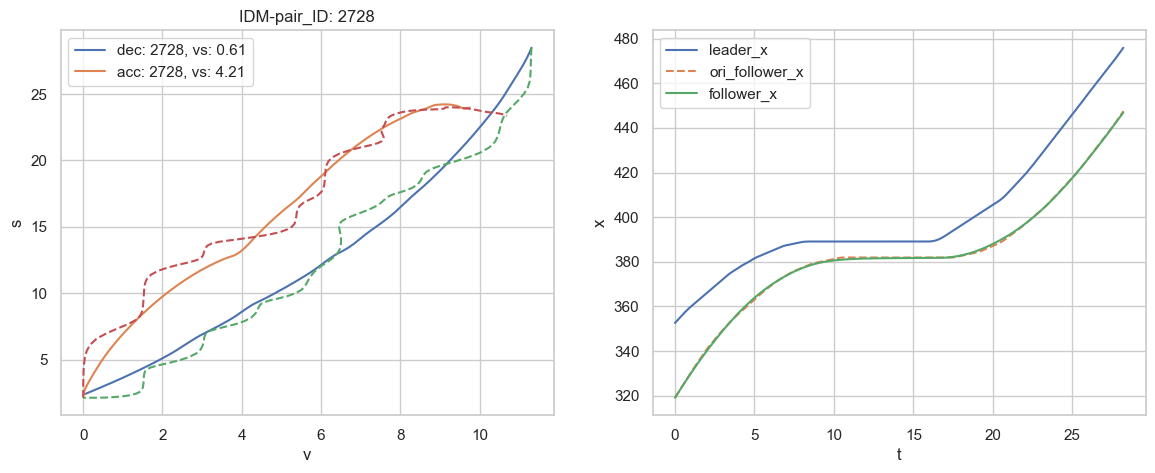

In [10]:
import random
import numpy as np
from trasim_simplified.core.kinematics.cfm import get_cf_equilibrium

cf_e = get_cf_equilibrium(cf_name)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig: plt.Figure = fig
axes: list[plt.Axes] = axes

id_ = random.choice(ids)
id_ = 2728
# pos = np.where(np.array(id_s) == id_)[0][0]

full_v = np.concatenate([df_clb["dec"][id_][TI.v], df_clb["acc"][id_][TI.v]])
full_lv = np.concatenate([df_clb["dec"][id_][Prefix.leader + TI.v], df_clb["acc"][id_][Prefix.leader + TI.v]])
full_lx = np.concatenate([df_clb["dec"][id_][Prefix.leader + TI.x], df_clb["acc"][id_][Prefix.leader + TI.x]])
full_x = np.concatenate([df_clb["dec"][id_][TI.x], df_clb["acc"][id_][TI.x]])
l_length = df_clb["dec"][id_][Prefix.leader + TI.v_Length].iloc[0]
time = np.arange(len(full_v)) * 0.1

plt.sca(axes[0])
plt.cla()
plt.xlabel("v")
plt.ylabel("s")
plt.plot(df_clb["dec"][id_][TI.v], df_clb["dec"][id_][Prefix.leader + TI.x] - df_clb["dec"][id_][TI.x] - l_length, label=f"dec: {id_}, vs: {df_param_merge[df_param_merge[TI.Pair_ID] == id_]['dec_vs'].iloc[0]:.2f}")
plt.plot(df_clb["acc"][id_][TI.v], df_clb["acc"][id_][Prefix.leader + TI.x] - df_clb["acc"][id_][TI.x] - l_length, label=f"acc: {id_}, vs: {df_param_merge[df_param_merge[TI.Pair_ID] == id_]['acc_vs'].iloc[0]:.2f}")
plt.plot(df_ori["dec"][id_][TI.v], df_ori["dec"][id_][Prefix.leader + TI.x] - df_ori["dec"][id_][TI.x] - l_length, linestyle="--")
plt.plot(df_ori["acc"][id_][TI.v], df_ori["acc"][id_][Prefix.leader + TI.x] - df_ori["acc"][id_][TI.x] - l_length, linestyle="--")

box = plt.ylim()

# gap = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_v)
# plt.plot(full_v, gap, linestyle=":", color="black", label="e_gap_v")

# gap_lv = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_lv)
# plt.plot(full_lv, gap_lv, linestyle="--", color="black", label="e_gap_lv")

plt.ylim(box)

plt.legend()
plt.title(f"{cf_name}-pair_ID: {id_}")

plt.sca(axes[1])
plt.cla()
plt.xlabel("t")
plt.ylabel("x")
plt.plot(time, full_lx, label="leader_x")
plt.plot(time, np.concatenate([df_ori["dec"][id_][TI.x], df_ori["acc"][id_][TI.x]]), label="ori_follower_x", linestyle="--")
plt.plot(time, full_x, label="follower_x")
# e_gap_own_v = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_v)
# plt.plot(time, full_lx - e_gap_own_v - l_length, linestyle=":", color="black", label="e_gap_v")
# e_gap_lv = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_lv)
# plt.plot(time, full_lx - e_gap_lv - l_length, linestyle="--", color="black", label="e_gap_lv")
plt.legend()
# plt.show()
plt.savefig(r"E:\PyProject\car-following-model-test\tests\data\traj" + f"_{cf_name}.png")

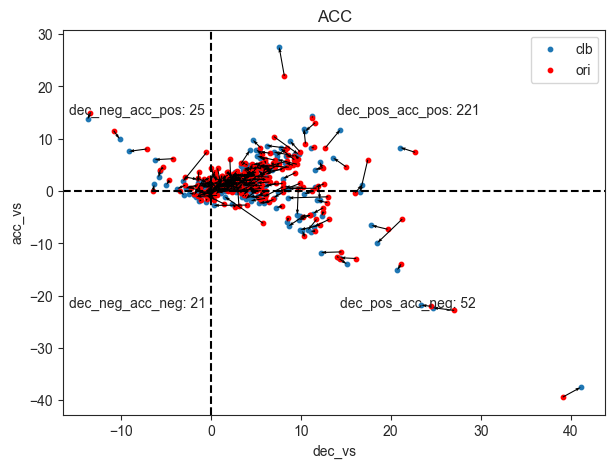

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax: plt.Axes = ax

df_param_merge.dropna()

ax.scatter(df_param_merge["dec_vs"], df_param_merge["acc_vs"], s=10, label="clb")
ax.scatter(df_param_merge["ori_dec_vs"], df_param_merge["ori_acc_vs"], c="r", s=10, label="ori")
ax.quiver(df_param_merge["ori_dec_vs"], df_param_merge["ori_acc_vs"], df_param_merge["dec_vs"] - df_param_merge["ori_dec_vs"], df_param_merge["acc_vs"] - df_param_merge["ori_acc_vs"], angles="xy", scale_units="xy", scale=1, width=0.002)
ax.set_xlabel("dec_vs")
ax.set_ylabel("acc_vs")
ax.set_title(cf_name)
# 绘制x=0以及y=0的直线
ax.axvline(0, c="black", linestyle="--")
ax.axhline(0, c="black", linestyle="--")
# 在分隔开的四个分区域中，在区域中心位置标注区域名称以及区域内的样本数量
w_l = ax.get_xlim()[0] / 2
w_r = ax.get_xlim()[1] / 2
h_u = ax.get_ylim()[1] / 2
h_d = ax.get_ylim()[0] / 2

ax.text(w_l, h_d, f"dec_neg_acc_neg: {len(df_param_merge[(df_param_merge['dec_vs'] < 0) & (df_param_merge['acc_vs'] < 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')
ax.text(w_l, h_u, f"dec_neg_acc_pos: {len(df_param_merge[(df_param_merge['dec_vs'] < 0) & (df_param_merge['acc_vs'] > 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')
ax.text(w_r, h_d, f"dec_pos_acc_neg: {len(df_param_merge[(df_param_merge['dec_vs'] > 0) & (df_param_merge['acc_vs'] < 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')
ax.text(w_r, h_u, f"dec_pos_acc_pos: {len(df_param_merge[(df_param_merge['dec_vs'] > 0) & (df_param_merge['acc_vs'] > 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.legend()
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\dec_acc_vs" + f"_{cf_name}.png")

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_13600\133571805.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1["species"] = "clb"


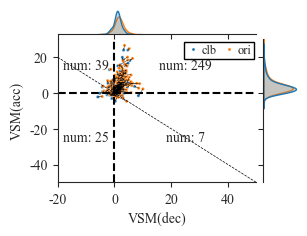

In [53]:
from seaborn import histplot
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rc('font',family='Times New Roman')
mm = 1 / 25.4  # mm转inch
fontsize = 10  # 7磅/pt/point
_width = 70 * mm  # 图片宽度英寸
_ratio = 5 / 7  # 图片长宽比
figsize = (_width, _width * _ratio)

temp1 = df_param_merge[["dec_vs", "acc_vs"]]
temp1["species"] = "clb"
temp2 = df_param_merge[["ori_dec_vs", "ori_acc_vs"]].rename(columns={"ori_dec_vs": "dec_vs", "ori_acc_vs": "acc_vs"})
temp2["species"] = "ori"
temp = pd.concat([temp1, temp2], axis=0).reset_index()

JointGrid = sns.jointplot(
    data=temp,
    x="dec_vs", y="acc_vs", hue="species",
    kind="scatter",
    xlim=(-20, 50),
    ylim=(-50, 30),
    s=5,
)
# 将散点图x轴显示范围限制在[-20, 50]，并且设置坐标轴刻度
JointGrid.ax_joint.set_xlim(-20, 50)
# 将散点图y轴显示范围限制在[-50, 30]，并且设置坐标轴刻度
JointGrid.ax_joint.set_ylim(-50, 30)
ax = JointGrid.ax_joint
ax.quiver(df_param_merge["ori_dec_vs"], df_param_merge["ori_acc_vs"], df_param_merge["dec_vs"] - df_param_merge["ori_dec_vs"], df_param_merge["acc_vs"] - df_param_merge["ori_acc_vs"], angles="xy", scale_units="xy", scale=1, width=0.002)
ax.set_xlabel("VSM(dec)", fontsize=10)
ax.set_ylabel("VSM(acc)", fontsize=10)
# ax.set_title(cf_name)
# 绘制x=0以及y=0的直线
ax.axvline(0, c="black", linestyle="--")
ax.axhline(0, c="black", linestyle="--")
# 在分隔开的四个分区域中，在区域中心位置标注区域名称以及区域内的样本数量
w_l = ax.get_xlim()[0] / 2
w_r = ax.get_xlim()[1] / 2
h_u = ax.get_ylim()[1] / 2
h_d = ax.get_ylim()[0] / 2

ax.text(w_l, h_d, f"num: {len(df_param_merge[(df_param_merge['dec_vs'] < 0) & (df_param_merge['acc_vs'] < 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')
temp = df_param_merge[(df_param_merge['dec_vs'] < 0) & (df_param_merge['acc_vs'] < 0)]
temp1 = temp["total_vs"]
ax.text(w_l, h_u, f"num: {len(temp)}", fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.text(w_r, h_d, f"num: {len(df_param_merge[(df_param_merge['dec_vs'] > 0) & (df_param_merge['acc_vs'] < 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')
ax.text(w_r, h_u, f"num: {len(df_param_merge[(df_param_merge['dec_vs'] > 0) & (df_param_merge['acc_vs'] > 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.legend(fontsize=fontsize - 1, frameon=True, framealpha=1, edgecolor="k", ncol=2, fancybox=False, shadow=False, borderpad=0.2, labelspacing=0.2, handletextpad=0.2, handlelength=1, columnspacing=0.5, borderaxespad=0.2)

ax.plot([-20, 50], [20, -50], linestyle="--", color="black", linewidth=0.5)

# 将图片尺寸设置为7*5
JointGrid.fig.set_size_inches(* figsize)
JointGrid.savefig(r"E:\PyProject\car-following-model-test\tests\data\dec_acc_vs" + f"_{cf_name}.tif", dpi=500, pil_kwargs={"compression": "tiff_lzw"})

# 不同减加速迟滞强度区间的参数变化趋势探究

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_9248\2966798881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_neg_acc_neg["hys_type"] = "dec_neg_acc_neg"
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_9248\2966798881.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_neg_acc_pos["hys_type"] = "dec_neg_acc_pos"
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_9248\2966798881.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

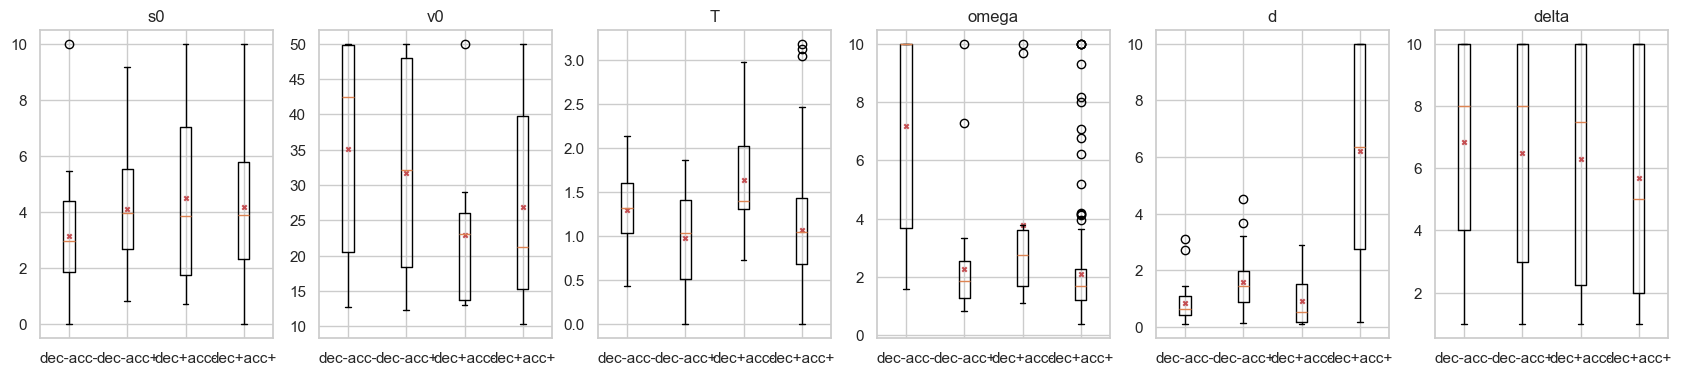

In [12]:
dec_neg_acc_neg = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0)]
dec_neg_acc_pos = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0)]
dec_pos_acc_neg = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0)]
dec_pos_acc_pos = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0)]

dec_neg_acc_neg["hys_type"] = "dec_neg_acc_neg"
dec_neg_acc_pos["hys_type"] = "dec_neg_acc_pos"
dec_pos_acc_neg["hys_type"] = "dec_pos_acc_neg"
dec_pos_acc_pos["hys_type"] = "dec_pos_acc_pos"
df_param_merge["hys_type"] = None
df_param_merge.loc[dec_neg_acc_neg.index, "hys_type"] = "dec_neg_acc_neg"
df_param_merge.loc[dec_neg_acc_pos.index, "hys_type"] = "dec_neg_acc_pos"
df_param_merge.loc[dec_pos_acc_neg.index, "hys_type"] = "dec_pos_acc_neg"
df_param_merge.loc[dec_pos_acc_pos.index, "hys_type"] = "dec_pos_acc_pos"


ax_num = len(param_names)
fig, axes = plt.subplots(1, ax_num, figsize=(21, 4))

for i, name in enumerate(param_names):
    axes[i].boxplot([dec_neg_acc_neg[name], dec_neg_acc_pos[name], dec_pos_acc_neg[name], dec_pos_acc_pos[name]], showfliers=True, widths=0.2)
    axes[i].scatter([1, 2, 3, 4], [dec_neg_acc_neg[name].mean(), dec_neg_acc_pos[name].mean(), dec_pos_acc_neg[name].mean(), dec_pos_acc_pos[name].mean()], c="r", s=10, marker="x")
    axes[i].set_title(name)
    axes[i].set_xticklabels(["dec-acc-", "dec-acc+", "dec+acc-", "dec+acc+"])

fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\type_param_boxplot" + f"_{cf_name}.png")
df_param_merge.to_pickle(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge" + f"_{cf_name}.pkl")

In [13]:
df_param_merge

,s0,v0,T,omega,d,delta,Pair_ID,ObjV,dec_vs,acc_vs,total_vs,dec_a,acc_a,ori_dec_vs,ori_acc_vs,ori_total_vs,ori_dec_a,ori_acc_a,hys_type
0,5.26,50.00,1.54,1.32,8.63,10.0,192,11.51,1.87,4.67,6.55,0.42,0.49,1.32,4.76,6.07,0.50,0.55,dec_pos_acc_pos
1,3.64,12.26,0.73,1.75,10.00,10.0,195,9.60,NaN,3.41,NaN,0.62,0.73,NaN,2.64,NaN,0.57,0.68,None
2,5.46,13.37,1.24,2.80,6.16,10.0,196,7.23,0.96,1.62,2.58,0.59,0.66,1.53,NaN,NaN,0.60,0.76,dec_pos_acc_pos
3,6.03,15.26,1.49,1.83,10.00,7.0,197,17.88,1.74,4.51,6.25,0.47,0.80,3.05,4.05,7.10,0.49,1.08,dec_pos_acc_pos
4,4.34,14.28,1.36,2.04,2.75,10.0,199,11.66,0.85,2.72,3.57,0.50,1.00,1.46,2.73,4.19,0.48,0.88,dec_pos_acc_pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.00,35.45,1.77,5.21,1.22,1.0,6216,10.67,-1.11,-0.84,-1.95,0.66,0.34,-0.56,-1.43,-1.99,0.69,0.43,dec_neg_acc_neg
316,2.14,39.90,0.31,1.50,0.97,1.0,6394,17.51,0.14,7.53,7.67,0.63,1.03,0.65,8.85,9.51,0.60,1.22,dec_pos_acc_pos
317,2.73,26.48,1.21,1.61,8.74,10.0,6395,6.64,1.27,7.65,8.91,0.56,1.16,1.62,8.01,9.63,0.57,1.34,dec_pos_acc_pos
318,2.59,16.54,1.47,2.78,10.00,3.0,6417,19.42,0.59,1.82,2.41,0.49,0.47,1.79,2.98,4.76,0.54,0.53,dec_pos_acc_pos


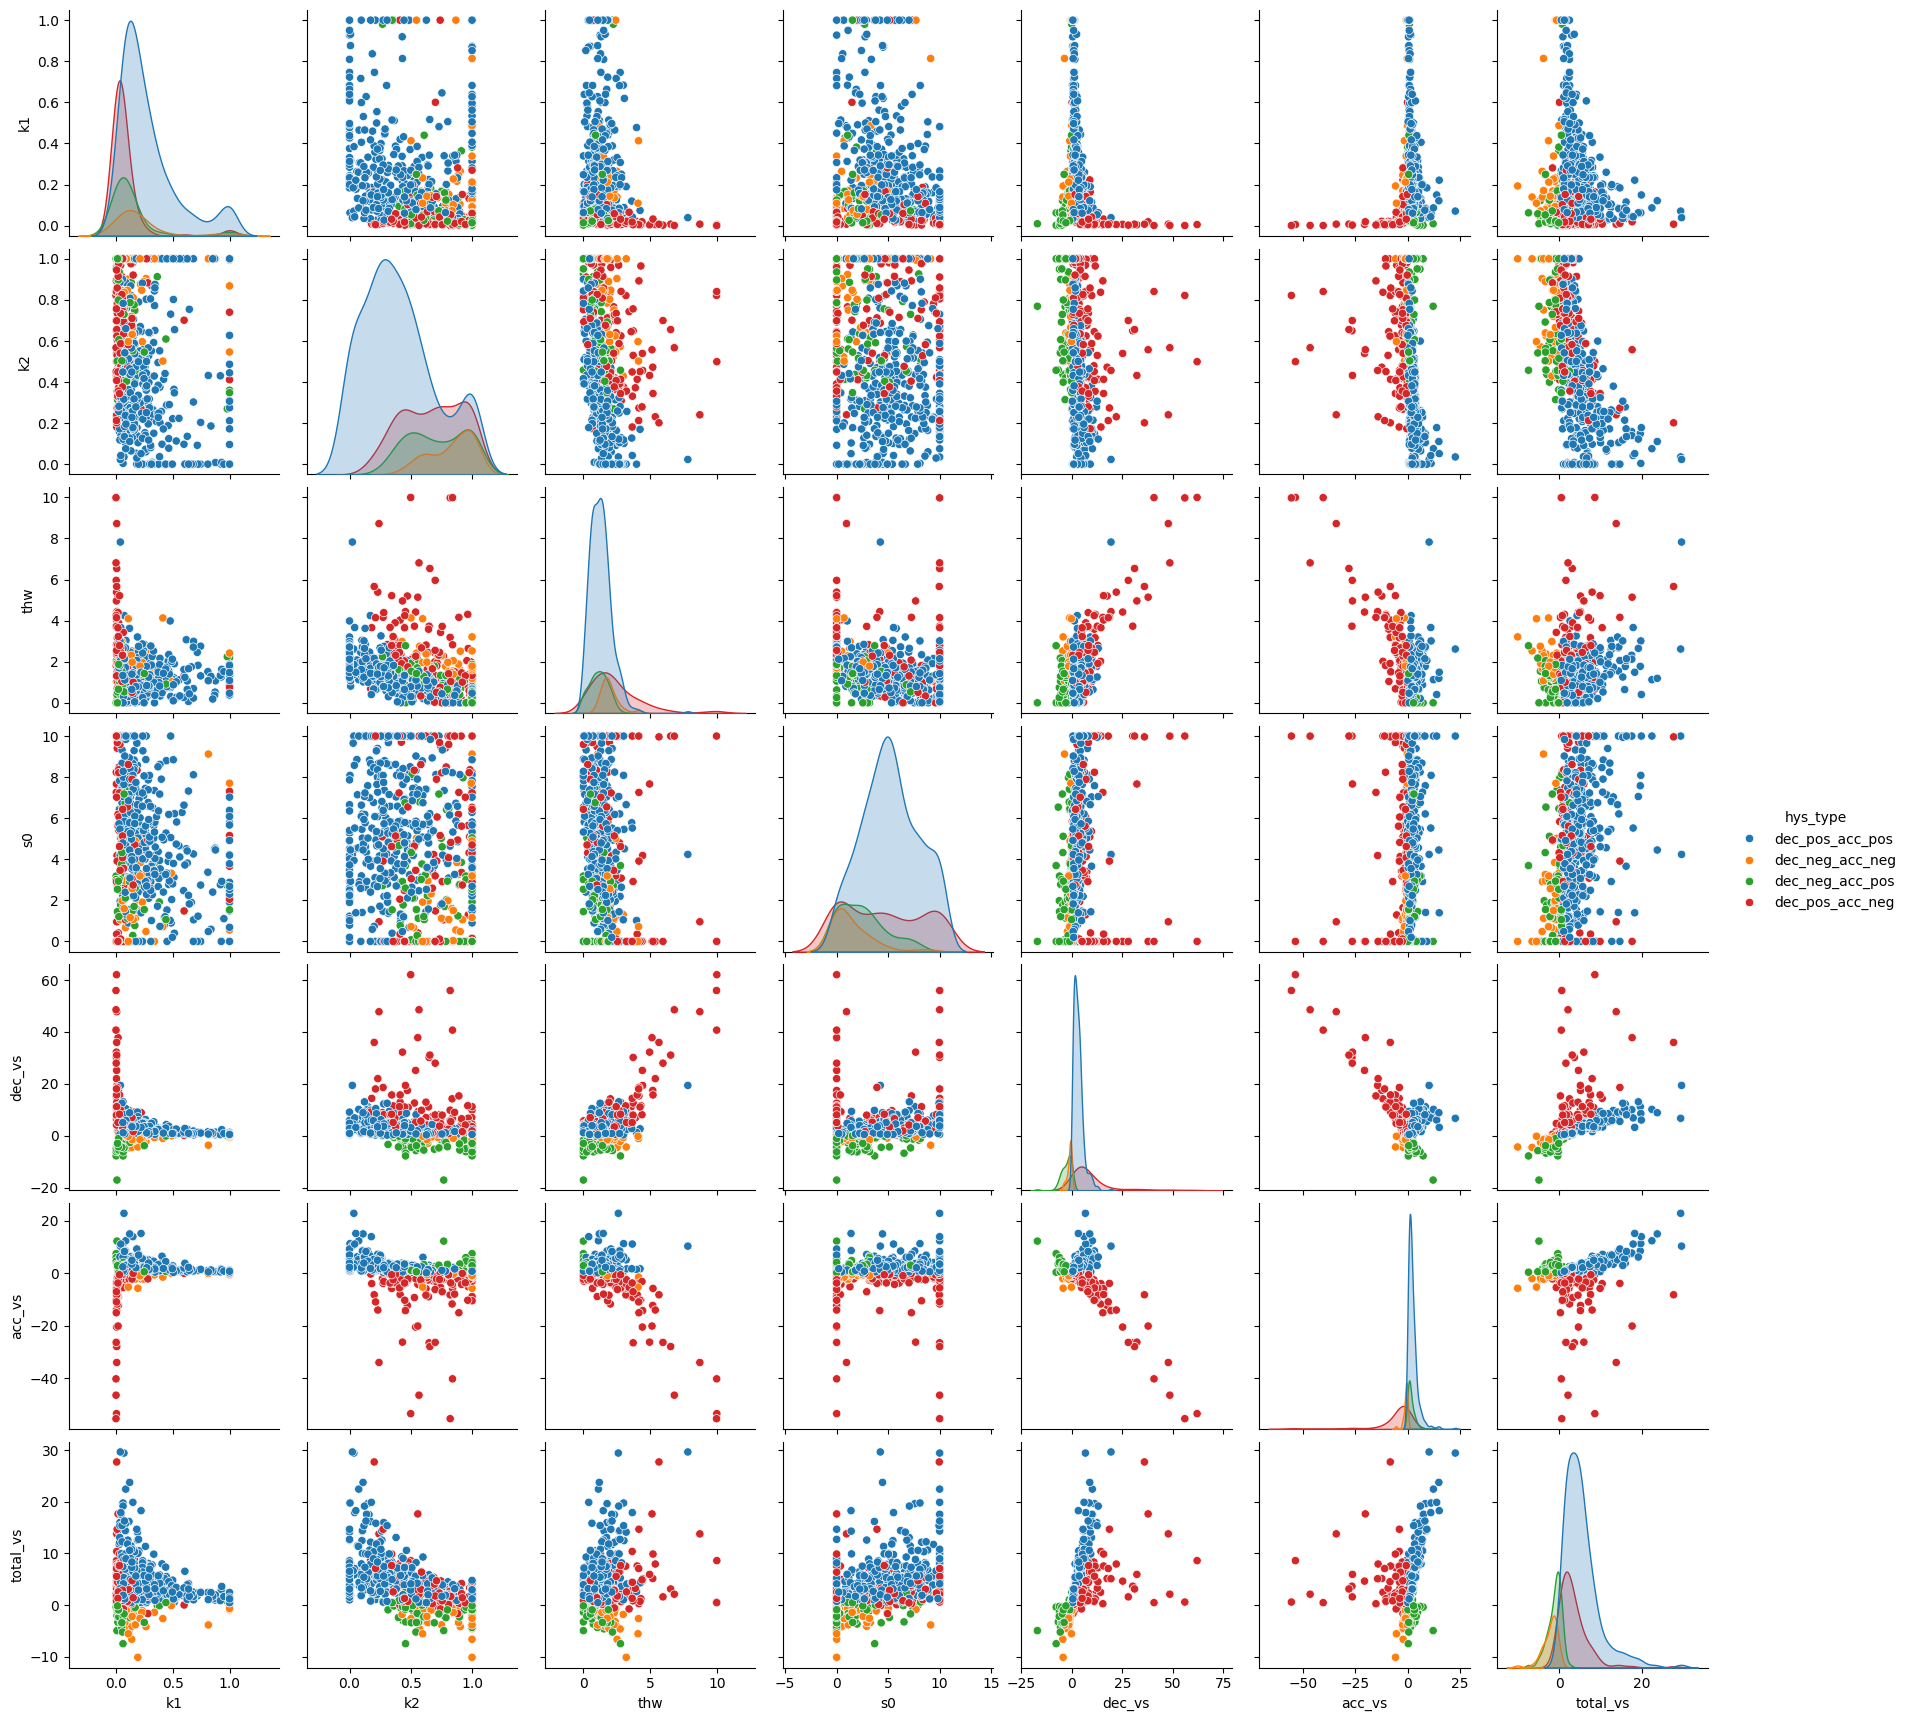

In [42]:
sns.pairplot(df_param_merge[[*param_names, "dec_vs", "acc_vs", "total_vs", "hys_type"]], hue='hys_type')

# 迟滞贡献指数

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [15]:
data = df_param_merge[param_names]
data

,s0,v0,T,omega,d,delta
0,5.26,50.00,1.54,1.32,8.63,10.0
1,3.64,12.26,0.73,1.75,10.00,10.0
2,5.46,13.37,1.24,2.80,6.16,10.0
3,6.03,15.26,1.49,1.83,10.00,7.0
4,4.34,14.28,1.36,2.04,2.75,10.0
...,...,...,...,...,...,...
315,0.00,35.45,1.77,5.21,1.22,1.0
316,2.14,39.90,0.31,1.50,0.97,1.0
317,2.73,26.48,1.21,1.61,8.74,10.0
318,2.59,16.54,1.47,2.78,10.00,3.0


In [16]:
target = np.zeros(len(df_param_merge), dtype=int)

target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1
target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0))[0]] = 2
target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0))[0]] = 3

print("target:", np.unique(target, return_counts=True))
target

target: (array([0, 1, 2, 3]), array([ 54,  35,  10, 221], dtype=int64))


array([3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 1,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3,
       3, 1, 3, 3, 3, 0, 3, 1, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3,
       3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0,
       0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 3, 0, 2, 3, 3, 3, 1, 3, 3, 3, 2, 3,
       3, 0, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 3, 3, 0,
       3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 2, 1,
       3, 0, 3, 3, 3, 1, 1, 0, 3, 3, 0, 0, 3, 1, 0, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 1, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       0, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3, 1,

In [17]:
def train(n, x_train, y_train, random_state=0):
    rfc: RandomForestClassifier = RandomForestClassifier(n_estimators=n, random_state=random_state)
    rfc.fit(x_train,y_train)
    return rfc

def test(rfc, x_test, y_test):
    return rfc.score(x_test, y_test)

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3)

In [51]:
result = joblib.Parallel(n_jobs=-1)(joblib.delayed(train)(n, Xtrain, Ytrain) for n in range(2, 50))

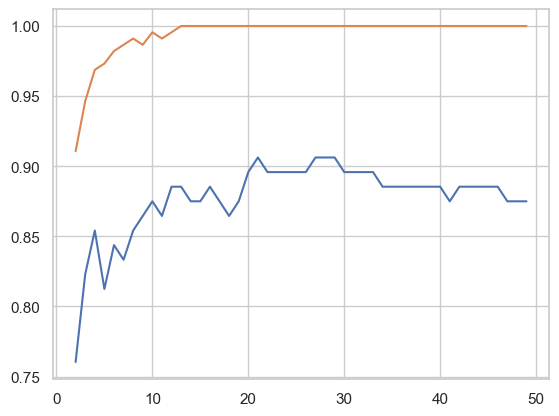

In [52]:
plt.plot(range(2, 50), [test(rfc, Xtest, Ytest) for rfc in result])
plt.plot(range(2, 50), [test(rfc, Xtrain, Ytrain) for rfc in result])

In [20]:
result = joblib.Parallel(n_jobs=-1)(joblib.delayed(train)(20, Xtrain, Ytrain, np.random.randint(0, 9999)) for _ in range(50))
score = [test(rfc, Xtest, Ytest) for rfc in result]
feature_importance = np.array([rfc.feature_importances_ for rfc in result])
print("mean score:", np.mean(score))
mean_importance = feature_importance.mean(axis=0)
pd.options.display.precision = 3
pd.DataFrame([*zip(param_names, mean_importance)]).T

mean score: 0.7891666666666667


,0,1,2,3,4,5
0,s0,v0,T,omega,d,delta
1,0.133,0.175,0.134,0.202,0.288,0.068


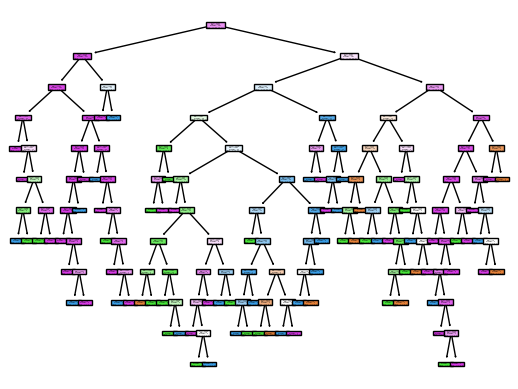

In [33]:
from sklearn.tree import plot_tree

plot_tree(result[0].estimators_[0], feature_names=param_names, filled=True)
plt.savefig(r"E:\PyProject\car-following-model-test\tests\data\type_param_tree" + f"_{cf_name}.svg")

## Spearman Correlation Coefficient

In [21]:
from scipy.stats import spearmanr
# 创建一个mask，隐藏上三角的非对角线部分
# mask = np.triu(np.ones_like(corr, dtype=bool))
df = df_param_merge[[*param_names, "dec_vs", "acc_vs", "total_vs"]]

sns.reset_defaults()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def cm2inch(x,y):
    return x/2.54,y/2.54

size1 = 10.5
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        "font.family":'serif',
        "font.size": size1,
        "font.serif": ['Times New Roman'],
    }
)
fontdict = {'weight': 'bold','size':size1,'family':'SimHei'}

df_coor= df.corr(method="spearman") # 相关性结果
fig = plt.figure(figsize=(cm2inch(16,12)))
ax1 = plt.gca()

#构造mask，去除重复数据显示
mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask)-1)*(-1)
mask = np.rot90(mask,k = -1)

im1 = sns.heatmap(df_coor,annot=True,cmap="coolwarm"
                  , mask=mask#构造mask，去除重复数据显示
                  ,vmax=1,vmin=-1
                  , fmt='.2f',ax = ax1)

ax1.tick_params(axis = 'both', length=0)


# #计算相关性显著性并显示
rlist = []
plist = []
df_np = df
print(df_np.shape)
for i in df_np.columns:
    for j in df_np.columns:
        r, p = spearmanr(df_np[i], df_np[j])
        rlist.append(r)
        plist.append(p)

rarr = np.asarray(rlist).reshape(df_coor.shape[0],df_coor.shape[0])
parr = np.asarray(plist).reshape(df_coor.shape[0],df_coor.shape[0])
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = (parr[int(m),int(n)])
        # rv = (rarr[int(m),int(n)])
        if mask2[int(m),int(n)]<1.:
            # if abs(rv) > 0.5:
            #     if  pv< 0.05 and pv>= 0.01:
            #         ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'white')
            #     if  pv< 0.01 and pv>= 0.001:
            #         ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'white')
            #     if  pv< 0.001:
            #         print([int(m),int(n)])
            #         ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'white')
            # else:
            if  pv< 0.05 and pv>= 0.01:
                ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'k')
            elif  pv< 0.01 and pv>= 0.001:
                ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'k')
            elif  pv< 0.001:
                ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'k')
plt.savefig(r"E:\PyProject\car-following-model-test\tests\data\param_corr" + f"_{cf_name}.png")

(320, 9)


## Xgboost

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# 切分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(data,target,test_size=0.2,random_state=7)

# xgboost模型初始化设置
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)
watchlist = [(dtrain,'train')]

# booster:
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':5,
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.025,
        'seed':0,
        'nthread':8,
        'gamma':0.15,
        'learning_rate' : 0.01}

# 建模与预测：50棵树
bst=xgb.train(params, dtrain, num_boost_round=50, evals=watchlist)
ypred=bst.predict(dtest)

# 设置阈值、评价指标
y_pred = (ypred >= 0.5)*1
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y,y_pred))
print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))

ypred = bst.predict(dtest)
print("测试集每个样本的得分\n",ypred)
ypred_leaf = bst.predict(dtest, pred_leaf=True)
print("测试集每棵树所属的节点数\n",ypred_leaf)
ypred_contribs = bst.predict(dtest, pred_contribs=True)
print("特征的重要性\n",ypred_contribs )

xgb.plot_importance(bst,height=0.8,title='', ylabel='特征')
plt.rc('font', family='Arial Unicode MS', size=14)
plt.show()

XGBoostError: [15:37:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:144: label must be in [0,1] for logistic regression